# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [22]:
cities

['havoysund',
 'lokosovo',
 'umzimvubu',
 'beba',
 'atagay',
 'comodoro rivadavia',
 'tura',
 'banmo',
 'granadilla de abona',
 'ouesso',
 'oparino',
 'beatrice',
 'chelmza',
 'kuytun',
 'stepnyak',
 'rocha',
 'darnah',
 'kamaishi',
 'punta umbria',
 'kilindoni',
 'puerto escondido',
 'albany',
 'orimattila',
 'khipro',
 'jumla',
 'bandarbeyla',
 'careiro da varzea',
 'hasaki',
 'leninskoye',
 'mendota',
 'amga',
 'celestun',
 'aripuana',
 'nishihara',
 'nuevo progreso',
 'lander',
 'valera',
 'basco',
 'asuncion',
 'superior',
 'pochutla',
 'vineland',
 'tasiilaq',
 'laguna',
 'vila velha',
 'palabuhanratu',
 'canutama',
 'gazni',
 'tuktoyaktuk',
 'tevaitoa',
 'plerin',
 'butaritari',
 'hami',
 'asbe teferi',
 'samusu',
 'dubbo',
 'pangnirtung',
 'novo aripuana',
 'sobolevo',
 'belushya guba',
 'kumluca',
 'waingapu',
 'biak',
 'port elizabeth',
 'mawlaik',
 'vao',
 'shingu',
 'mount gambier',
 'jamestown',
 'zyryanka',
 'mezen',
 'sokoni',
 'punta arenas',
 'utiroa',
 'los llanos de 

In [20]:
# getting unique values
_citiesSet = set(cities)
cities = list(_citiesSet)

# citiesTest = cities[0:10]

In [21]:
 len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
resultsDataframe = pd.DataFrame({
    "City":[],
    "Cloudiness": [],
    "Country":[],
    "Date":[],
    "Humidity":[],
    "Lat":[],
    "Lng":[],
    "Max Temp":[],
    "Wind Speed":[]
})
base_url = 'http://api.openweathermap.org/data/2.5/weather'
index = 1;
for city in cities:    
    params = {
        'q': city,
        'APPID': '1e7ce3f80af2ad5a262f54a89f59665a'
    }
    response = requests.get(base_url, params=params)
    # Processing Record 4 of Set 1 | bengkulu
    # City not found. Skipping...
    if(response.status_code==200):        
        result = response.json()
        print(f"Processing Record {index} of Set 1 | {city}")
    #   print(f"Retrieving Results from {response.url}")
    #   print(f"Retrieving Results for city: {response.status_code} {city}.")
        try:
            resultsDataframe.loc[index] = [
                city,
                result["clouds"]["all"],
                result["sys"]["country"],
                result["dt"],
                result["main"]["humidity"],
                result["coord"]["lat"],
                result["coord"]["lon"],
                result["main"]["temp_max"],
                result["wind"]["speed"],
            ]
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
        
    
    else:
        print("City not found. Skipping...")
        
    index += 1
    

Processing Record 1 of Set 1 | havoysund
Processing Record 2 of Set 1 | lokosovo
City not found. Skipping...
Processing Record 4 of Set 1 | beba
Processing Record 5 of Set 1 | atagay
Processing Record 6 of Set 1 | comodoro rivadavia
Processing Record 7 of Set 1 | tura
City not found. Skipping...
Processing Record 9 of Set 1 | granadilla de abona
Processing Record 10 of Set 1 | ouesso
Processing Record 11 of Set 1 | oparino
Processing Record 12 of Set 1 | beatrice
Processing Record 13 of Set 1 | chelmza
Processing Record 14 of Set 1 | kuytun
Processing Record 15 of Set 1 | stepnyak
Processing Record 16 of Set 1 | rocha
Processing Record 17 of Set 1 | darnah
Processing Record 18 of Set 1 | kamaishi
Processing Record 19 of Set 1 | punta umbria
Processing Record 20 of Set 1 | kilindoni
Processing Record 21 of Set 1 | puerto escondido
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | orimattila
Processing Record 24 of Set 1 | khipro
Processing Record 25 of Set 1 | jumla

Processing Record 205 of Set 1 | ponta do sol
Processing Record 206 of Set 1 | salalah
Processing Record 207 of Set 1 | pitimbu
Processing Record 208 of Set 1 | kamenka
Processing Record 209 of Set 1 | raudeberg
Processing Record 210 of Set 1 | tha chang
City not found. Skipping...
Processing Record 212 of Set 1 | high level
Processing Record 213 of Set 1 | aviles
Processing Record 214 of Set 1 | ucluelet
Processing Record 215 of Set 1 | chiang rai
Processing Record 216 of Set 1 | praya
Processing Record 217 of Set 1 | san cristobal
Processing Record 218 of Set 1 | kapaa
Processing Record 219 of Set 1 | beringovskiy
Processing Record 220 of Set 1 | ancud
Processing Record 221 of Set 1 | calbuco
Processing Record 222 of Set 1 | scottsbluff
Processing Record 223 of Set 1 | lasa
Processing Record 224 of Set 1 | vardo
Processing Record 225 of Set 1 | muros
Processing Record 226 of Set 1 | sohag
Processing Record 227 of Set 1 | carnarvon
Processing Record 228 of Set 1 | quang ngai
Processin

City not found. Skipping...
City not found. Skipping...
Processing Record 405 of Set 1 | kurush
Processing Record 406 of Set 1 | fukue
Processing Record 407 of Set 1 | majene
City not found. Skipping...
Processing Record 409 of Set 1 | vaini
Processing Record 410 of Set 1 | anloga
Processing Record 411 of Set 1 | lagoa
Processing Record 412 of Set 1 | aden
Processing Record 413 of Set 1 | doha
Processing Record 414 of Set 1 | daitari
Processing Record 415 of Set 1 | la romana
Processing Record 416 of Set 1 | eureka
Processing Record 417 of Set 1 | yumen
Processing Record 418 of Set 1 | antofagasta
Processing Record 419 of Set 1 | xai-xai
Processing Record 420 of Set 1 | haines junction
Processing Record 421 of Set 1 | kavieng
Processing Record 422 of Set 1 | praia
Processing Record 423 of Set 1 | culpeper
City not found. Skipping...
Processing Record 425 of Set 1 | mairana
City not found. Skipping...
Processing Record 427 of Set 1 | meulaboh
Processing Record 428 of Set 1 | yellowknife

Processing Record 607 of Set 1 | nikolskoye
Processing Record 608 of Set 1 | sitka
Processing Record 609 of Set 1 | port macquarie
Processing Record 610 of Set 1 | sainte-suzanne
City not found. Skipping...
Processing Record 612 of Set 1 | palafrugell
City not found. Skipping...
Processing Record 614 of Set 1 | kahului
Processing Record 615 of Set 1 | kaluga
Processing Record 616 of Set 1 | sinnamary
Processing Record 617 of Set 1 | fort nelson
Processing Record 618 of Set 1 | mackay
Processing Record 619 of Set 1 | spearfish
Processing Record 620 of Set 1 | bereda
City not found. Skipping...
Processing Record 622 of Set 1 | pouembout
Processing Record 623 of Set 1 | lalganj
Processing Record 624 of Set 1 | conceicao da barra
Processing Record 625 of Set 1 | atar
Processing Record 626 of Set 1 | willowmore
Processing Record 627 of Set 1 | rundu
Processing Record 628 of Set 1 | jiwani
City not found. Skipping...
Processing Record 630 of Set 1 | larsnes
Processing Record 631 of Set 1 | n

In [26]:
resultsDataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,havoysund,75.0,NO,1.554125e+09,86.0,71.00,24.66,274.150,10.80
2,lokosovo,92.0,RU,1.554127e+09,89.0,61.13,74.84,273.579,5.68
4,beba,20.0,CU,1.554123e+09,78.0,22.44,-79.73,296.150,2.10
5,atagay,0.0,RU,1.554127e+09,59.0,55.10,99.39,275.679,4.10
6,comodoro rivadavia,0.0,AR,1.554124e+09,42.0,-45.87,-67.48,292.150,4.60


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
resultsDataframe.to_csv('WheatherPy.csv')
resultsDataframe.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [28]:
resultsDataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,havoysund,75.0,NO,1.554125e+09,86.0,71.00,24.66,274.150,10.80
2,lokosovo,92.0,RU,1.554127e+09,89.0,61.13,74.84,273.579,5.68
4,beba,20.0,CU,1.554123e+09,78.0,22.44,-79.73,296.150,2.10
5,atagay,0.0,RU,1.554127e+09,59.0,55.10,99.39,275.679,4.10
6,comodoro rivadavia,0.0,AR,1.554124e+09,42.0,-45.87,-67.48,292.150,4.60


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

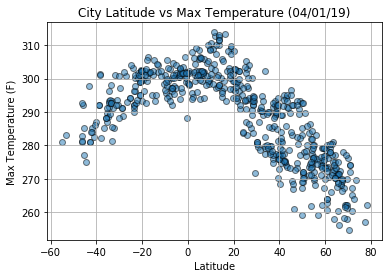

In [30]:
# Build a scatter plot for each data type
plt.scatter(resultsDataframe["Lat"], resultsDataframe["Max Temp"], marker="o", alpha=0.5, edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (04/01/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Max Temperature.png")

# Show plot
plt.show()

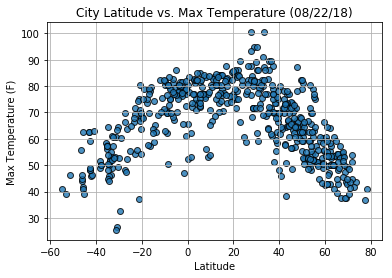

#### Latitude vs. Humidity Plot

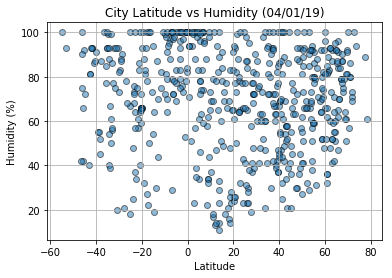

In [31]:
# Build a scatter plot for each data type
plt.scatter(resultsDataframe["Lat"], resultsDataframe["Humidity"], marker="o", alpha=0.5, edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (04/01/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Humidity.png")

# Show plot
plt.show()

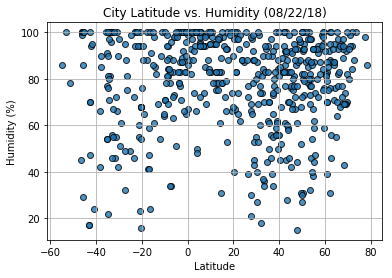

#### Latitude vs. Cloudiness Plot

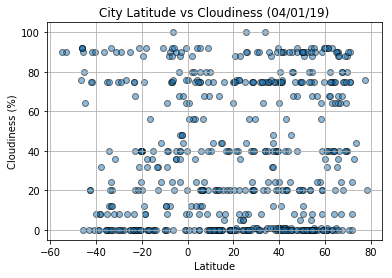

In [32]:
# Build a scatter plot for each data type
plt.scatter(resultsDataframe["Lat"], resultsDataframe["Cloudiness"], marker="o", alpha=0.5, edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (04/01/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Cloudiness.png")

# Show plot
plt.show()

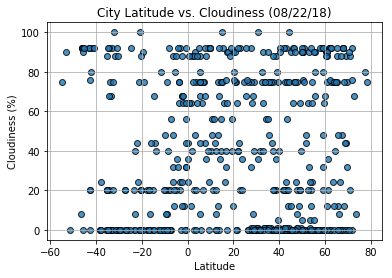

#### Latitude vs. Wind Speed Plot

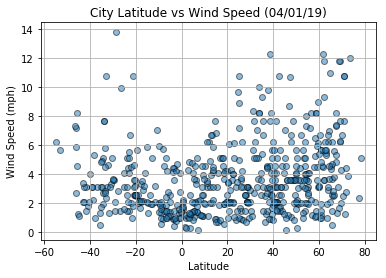

In [34]:
# Build a scatter plot for each data type
plt.scatter(resultsDataframe["Lat"], resultsDataframe["Wind Speed"], marker="o", alpha=0.5, edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (04/01/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Wind Speed.png")

# Show plot
plt.show()

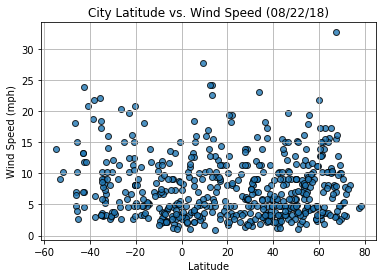